Produce a pretty complicated contour plot with user selected colorbars and unevenly spaced contour intervals based on the discussions found at this website
https://stackoverflow.com/questions/16834861/create-own-colormap-using-matplotlib-and-plot-color-scale

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
#    print "seq",seq
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)
def diverge_map(high=(1., 0., 0.), low=(0.0, 0., 1.)):
#def diverge_map(high=(0.565, 0.392, 0.173), low=(0.094, 0.310, 0.635)):
    '''
    low and high are colors that will be used for the two
    ends of the spectrum. they can be either color strings
    or rgb color tuples
    '''
    c = mcolors.ColorConverter().to_rgb
    wt = (1.,1.,1.)
    if isinstance(low, basestring): low = c(low)
    if isinstance(high, basestring): high = c(high)
    return make_colormap([low, c('white'), 0.5, c('white'), high])


In [2]:
# create field with some NaNs and masked values

origin = 'lower'
#origin = 'upper'

delta = 0.025

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z1 = plt.mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = plt.mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = 10 * (Z1 - Z2)

nr, nc = Z.shape

# put NaNs in one corner:
Z[-nr//6:, -nc//6:] = np.nan
# contourf will convert these to masked


Z = np.ma.array(Z)
# mask another corner:
Z[:nr//6, :nc//6] = np.ma.masked

# mask a circle in the middle:
interior = np.sqrt((X**2) + (Y**2)) < 0.5
Z[interior] = np.ma.masked


/Users/d3x345/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  # Remove the CWD from sys.path while we load stuff.
/Users/d3x345/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  # This is added back by InteractiveShellApp.init_path()


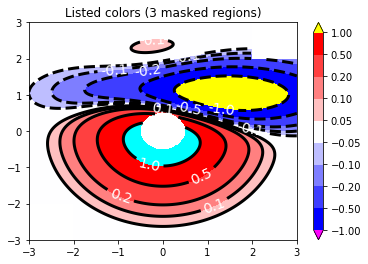

In [3]:

# Now make a contour plot with the levels specified,
# and with the colormap generated automatically from a list
# of colors.
levels = [-1.5, -1, -0.5, 0, 0.5, 1]
levels = [-1.,-0.5,-0.2,-0.1,-0.05,0.05,0.1,0.2,0.5,1.]
cmap = diverge_map()
#norm = mpl.colors.Normalize(vmin=-1., vmax=1.)
norm = mpl.colors.BoundaryNorm(levels,cmap.N)

#print "cmap", help(cmap)

CS3 = plt.contourf(X, Y, Z, levels,
#                   colors=('r', 'w', 'b'),
                   cmap=cmap,
                   norm=norm,
                   origin=origin,
                   extend='both')
# Our data range extends outside the range of levels; make
# data below the lowest contour level yellow, and above the
# highest level cyan:
CS3.cmap.set_under('yellow')
CS3.cmap.set_over('cyan')

CS4 = plt.contour(X, Y, Z, levels,
                  colors=('k',),
                  linewidths=(3,),
                  origin=origin)
plt.title('Listed colors (3 masked regions)')
plt.clabel(CS4, fmt='%2.1f', colors='w', fontsize=14)

# Notice that the colorbar command gets all the information it
# needs from the ContourSet object, CS3.
plt.colorbar(CS3)

# Illustrate all 4 possible "extend" settings:
extends = ["neither", "both", "min", "max"]
#cmap = plt.cm.get_cmap("winter")
cmap.set_under("magenta")
cmap.set_over("yellow")

# Note: contouring simply excludes masked or nan regions, so
# instead of using the "bad" colormap value for them, it draws
# nothing at all in them.  Therefore the following would have
# no effect:
# cmap.set_bad("red")



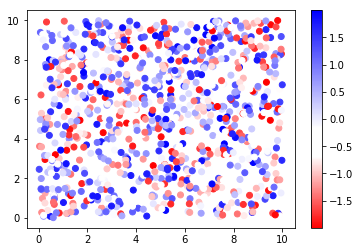

In [4]:
c = mcolors.ColorConverter().to_rgb
rvb = make_colormap(
    [c('red'), c('white'), 0.33, c('white'), c('white'), 0.46, c('white'), c('blue')])
N = 1000
array_dg = np.random.uniform(0, 10, size=(N, 2))
colors = np.random.uniform(-2, 2, size=(N,))
plt.scatter(array_dg[:, 0], array_dg[:, 1], c=colors, cmap=rvb)
plt.colorbar()
plt.show()

[-1.0, -0.5, -0.2, -0.1, -0.05, -0.02, -0.01, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]
[-0.5, -0.1, -0.02, 0.01, 0.05, 0.2, 1.0]


/Users/d3x345/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'ticks'
  s)
/Users/d3x345/miniconda2/lib/python2.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


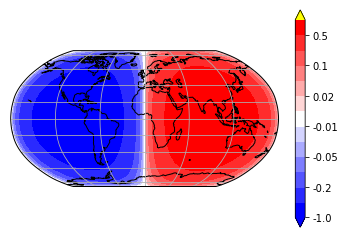

In [5]:

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap, BoundaryNorm
from cartopy.examples.waves import sample_data
import numpy as np
import matplotlib as mpl

ax = plt.axes(projection=ccrs.Robinson())
#ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_global()

lons, lats, data = sample_data(shape=(20, 40))
data = np.sin(lons/57.296)*np.cos(lats/57.296)*1.1
levels = [-1.,-0.5,-0.2,-0.1,-0.05,-0.02,-0.01,0.01,0.02,0.05,0.1,0.2,0.5,1.]
#levels = np.linspace(-1., 1., 17)
#levels = [levels[i] for i in range(len(levels)) if levels[i] != 0.]
print levels
#cmap = ListedColormap(['r', 'g', 'b'])
#cmap = plt.get_cmap('PiYG') # see https://matplotlib.org/examples/color/colormaps_reference.html
#cmap = plt.get_cmap('viridis') # see https://matplotlib.org/examples/color/colormaps_reference.html

cmap = diverge_map()
norm = mpl.colors.BoundaryNorm(levels,cmap.N)
#norm = mpl.colors.Normalize(vmin=-1., vmax=1.)
#print "norm", dir(norm)

# note the transform argument identifies what the coordinate spedification is of the original original data
# platecarree means that it is on a lat/lon grid. The projection to display is actually specified in axes call above
# see http://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html

plt.contourf(lons, lats, data, levels, ticks=levels, norm=norm, cmap=cmap, transform=ccrs.PlateCarree(),extend='both')
#data.max()

cbar = plt.colorbar()
cmap.set_under("blue")
cmap.set_over("yellow")
#levels = [levels[0],levels[-1]]
cbar.set_ticks(levels[0::2])
cbar.set_ticklabels(levels[0::2])
print levels[1::2]

ax.coastlines()
ax.gridlines()

#plt.show()

plt.savefig("test.pdf",type="pdf")

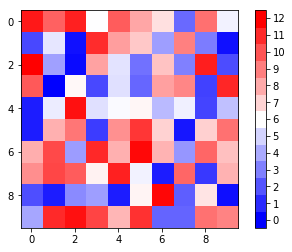

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def colorbar_index(ncolors, cmap):
    cmap = cmap_discretize(cmap, ncolors)
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    return colorbar

def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)
    """

    if type(cmap) == str:
        cmap = plt.get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
    cdict = {}
    for ki,key in enumerate(('red','green','blue')):
        cdict[key] = [ (indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki])
                       for i in xrange(N+1) ]
    # Return colormap object.
    return mcolors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

fig, ax = plt.subplots()
A = np.random.random((10,10))*10
cmap = plt.get_cmap('YlGnBu')
cmap = diverge_map()
ax.imshow(A, interpolation='nearest', cmap=cmap)
cbar = colorbar_index(ncolors=13, cmap=cmap)  
# cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])  # label a few ticks
#help(cbar.ax)

plt.show()

(-10, 10)

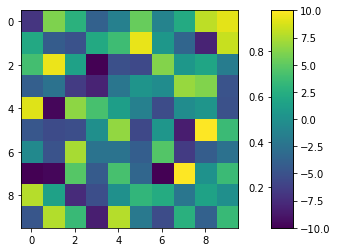

In [7]:
# Basically, you can use twinx to create another Y-axis, but when I try it to the colobar axe, the aspect setting cause some problem, so I use set_position() to change the width of the two axes, here is the code:

import pylab as pl
import numpy as np
a = np.random.rand(10, 10)
pl.imshow(a)
cb = pl.colorbar(pad=0.1)

l, b, w, h = cb.ax.get_position().bounds
cb.ax.set_aspect("auto")
w = 0.05
ax2 =pl.twinx(ax=cb.ax)
cb.ax.set_position([l, b, w, h])
ax2.set_position([l, b, w, h])
cb.ax.set_ylim(0, 1)
ax2.set_ylim(-10, 10)

In [8]:

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap, BoundaryNorm
from cartopy.examples.waves import sample_data




lons, lats, data = sample_data(shape=(20, 40))
data = np.sin(lons/57.296)*np.cos(lats/57.296)*1.1
levels = [-1.,-0.5,-0.2,-0.1,-0.05,0.05,0.1,0.2,0.5,1.]

fig, (ax0,ax1,ax2) = plt.subplots(3, 1,1)
#fig.subplots_adjust(hspace=0.3)
print "ax0", ax0

#    cs = ax.contourf(X, Y, Z, levels, cmap=cmap, extend=extend, origin=origin)
cmap0 = plt.get_cmap('PiYG') # see https://matplotlib.org/examples/color/colormaps_reference.html
norm0 = mpl.colors.BoundaryNorm(levels,cmap.N)
cmap0.set_under("blue")
cmap0.set_over("yellow")
cs0 = ax0.contourf(lons, lats, data, levels, norm=norm0, cmap=cmap0,extend='both')
#cs0 = ax0.contourf(lons, lats, data, levels, norm=norm0, cmap=cmap0, transform=ccrs.PlateCarree(),extend='both')
fig.colorbar(cs0, ax=ax0, shrink=0.9)
ax0.set_title("extend = %s" % extend)
ax0.locator_params(nbins=4)
ax0 = plt.axes(projection=ccrs.Robinson())
ax0.set_global()
ax0.coastlines()
ax0.gridlines()

# note the transform argument identifies what the coordinate spedification is of the original original data
# platecarree means that it is on a lat/lon grid. The projection to display is actually specified in axes call above
# see http://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html




plt.show()

#plt.savefig("test.pdf",type="pdf")

/Users/d3x345/anaconda/envs/uvcdat-2.12/lib/python2.7/site-packages/matplotlib/figure.py:1324: UserWarning: sharex argument to subplots() was an integer. Did you intend to use subplot() (without 's')?
  "sharex argument to subplots() was an integer. "


ValueError: sharex [1] must be one of [u'all', u'row', u'col', u'none']

<Figure size 432x288 with 0 Axes>